<a href="https://colab.research.google.com/github/gonzalezzayra/INVESTIGACION-DE-OPERACIONES/blob/main/Modelos_de_Redes_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Uso de Libreria Networkx**

NetworkX es una paquetería de Python para la creación, manipulación y estudio de la estructura, dinámica y funciones de redes complejas.

**Grafo dirigido**

Un grafo dirigido, también llamado dígrafo, es un grafo en el que cada arista tiene una dirección, lo que significa que va de un vértice a otro, pero no necesariamente al revés.

Importar la libreria networkx como 'nx', se recomienda importarla como nx para ahorrar escritura

In [810]:
import networkx as nx
import matplotlib.pyplot as plt

Definimos el grafo dirigido, añadimos los arcos que tenemos planteados.



*   A a B
*   A a C
*   B a C
*   B a D
*   C a D   



In [811]:
G = nx.DiGraph() #grafo dirigido, defino el grafo dirigido, capacity es el flujo
G.add_edge("A", "B", capacity = 2) #A -> B
G.add_edge("A", "C", capacity = 2) #A -> C
G.add_edge("B", "C", capacity = 2) #B -> C
G.add_edge("B", "D", capacity = 2) #B -> D
G.add_edge("C", "D", capacity = 2) #C -> D

Dibujamos la red que tenemos definida en G, que se dibuja de diferentes formas

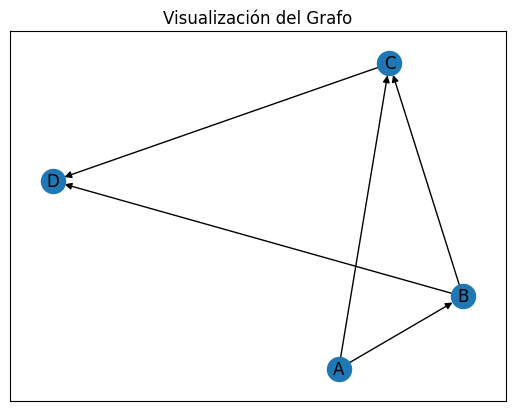

In [812]:
nx.draw_networkx(G)
plt.title("Visualización del Grafo")
plt.show()

Este comando da el conjunto de nodos

In [813]:
nx.nodes(G)

NodeView(('A', 'B', 'C', 'D'))

Este comando da el conjunto de arcos

In [814]:
nx.edges(G)

OutEdgeView([('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D')])

Este comando da el número de nodos

In [815]:
nx.number_of_nodes(G)

4

Este comando da el número de arcos  

In [816]:
nx.number_of_edges(G)

5

Este comando da el número de arcos a los que esta conectado, en otros terminos el número de aristas de cada nodo

In [817]:
nx.degree(G)

DiDegreeView({'A': 2, 'B': 3, 'C': 3, 'D': 2})

Con este comando se puede añadir un nodo, dibujamos la red para poder verlo

In [818]:
G.add_node("E")

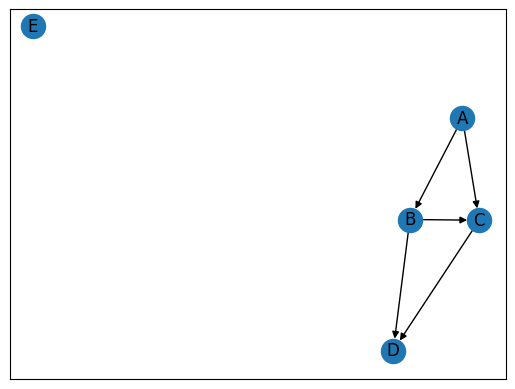

In [819]:
nx.draw_networkx(G)

Este comando añade nodos de la lista

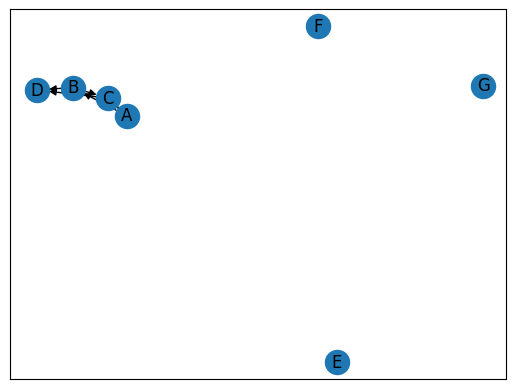

In [820]:
G.add_nodes_from(["F", "G"])
nx.draw_networkx(G)

**Otro ejemplo**

In [821]:
import networkx as nx #Importar libreria
import matplotlib.pyplot as plt #Importar libreria para graficar

In [822]:
G = nx.DiGraph() #Definir grafo

In [823]:
#Con esta función se añaden nodos
#Al nodo se le asigna el atributo nombre
G.add_node('A', nombre = 'Nodo A')
G.add_node('B', nombre = 'Nodo B')
G.add_node('C', nombre = 'Nodo C')
G.add_node('D', nombre = 'Nodo D')

In [824]:
#Se añaden los arcos que llevan de un nodo a otro
G.add_edge('A', 'B', capacity=3) #A -> B
G.add_edge('A', 'C', capacity=2) #A -> C
G.add_edge('B', 'C', capacity=2) #B -> C
G.add_edge('B', 'D', capacity=3) #B -> D
G.add_edge('C', 'D', capacity=2) #C -> D

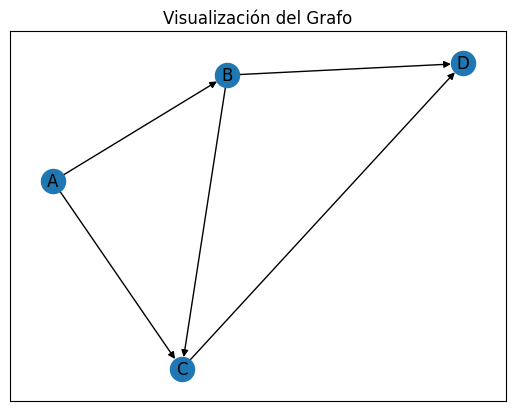

In [825]:
#Dibujamos el grafo
nx.draw_networkx(G)
plt.title("Visualización del Grafo") #Se le pone título al grafo
plt.show()

De la función para los nodos

```
draw_networkx_nodes(G, posicion, node_size=2000, node_color='green')
```

los paramétros son  (grafo, posición, tamaño del nodo, color del nodo)

De la función para las etiquetas
```
nx.draw_networkx_labels(G, posicion, font_size=12, font_weight='bold')
```
los paramétros son (grafo, posición, tamaño de la fuente, grosor de la fuente)


De la función para los arcos
```
nx.draw_networkx_edges(G, posicion, edge_color='black', width=2, arrowsize=35)
```
los paramétros son (grafo, posición, color del arco, grosor, tamaño de la flecha)


De la función de las etiquetas de los arcos (antes definida)



```
nx.draw_networkx_edge_labels(G, posicion, edge_labels=edge_labels, font_color='red')
```
los paramétros son (grafo, posición, etiquetas de los arcos, color de la fuente de los arcos)


**Flujo máximo**

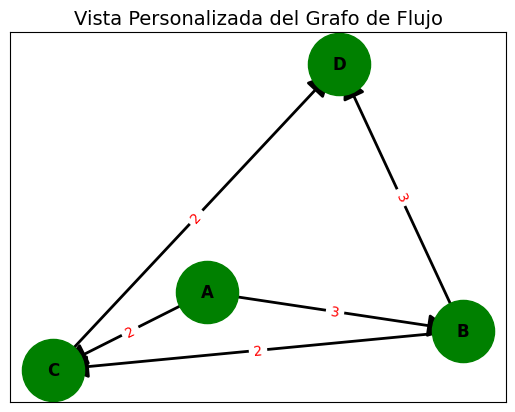

In [826]:
#Esto es para fijar los nodos y no cambien cada vez que se compila
posicion = nx.spring_layout(G, seed=42)

#Esto es para incluir las etiquetas de 'capacity'
edge_labels = nx.get_edge_attributes(G, 'capacity')

#Configurar el tamaño de la gráfica/figura
#plt.figure(figsize=(10, 6))

#Componentes
nx.draw_networkx_nodes(G, posicion, node_size=2000, node_color='green')
nx.draw_networkx_labels(G, posicion, font_size=12, font_weight='1000')
nx.draw_networkx_edges(G, posicion, edge_color='black', width=2, arrowsize=35)
nx.draw_networkx_edge_labels(G, posicion, edge_labels=edge_labels, font_color='red')

#Título de la gráfica
plt.title("Vista Personalizada del Grafo de Flujo", size=14)
plt.show()

In [827]:
#Imprimimos el atributo del nodo 'A'
print("Atributo de 'A': ", G.nodes['A'])

Atributo de 'A':  {'nombre': 'Nodo A'}



La función
```
nx.maximum_flow(G, 'A', 'D')
```
sirve para calcular el flujo máximo, tiene los parámetros de (grafo, nodo inicial, nodo final)

La función devuelve el valor númerico y un diccionario



```
flow_value & flow_dict
```



In [828]:
#Calcula el valor del flujo máximo del nodo A al nodo D
flow_value, flow_dict = nx.maximum_flow(G, 'A', 'D')

#Se imprime el flujo máximo
print("El flujo máximo de A a D es", flow_value)

#Se imprime la capacidad/flujo de donde se dirige el arco
print("\nEl flujo detallado por cada arco es:")

#El primer for es para el diccionario
#El sgundo for es para el flujo
for nodo, arcos in flow_dict.items():
    for destino, flujo in arcos.items():
        if flujo > 0: #Si el flujo es mayor a 0 se imprime el flujo
            print(f"  {nodo} -> {destino}: {flujo}")

El flujo máximo de A a D es 5

El flujo detallado por cada arco es:
  A -> B: 3
  A -> C: 2
  B -> D: 3
  C -> D: 2


**Grafo No Dirigido**

Un grafo no dirigido, también llamado grafo simple, es un grafo en el que cada arista no tiene dirección, lo que significa que conecta dos vértices en ambos sentidos.

**Árbol de expansión mínima**

In [829]:
import networkx as nx
import matplotlib.pyplot as plt

In [830]:
#Crea un grafo no dirigido
G = nx.Graph()

En este caso manejamos 'weight' y mencionamos que es el peso, pero también puede ser considerado como distancia, costo o tiempo; dependiendo de como se quiera definir.

Para este ejemplo se define como el peso.

In [831]:
#Se le pone 'weight' porque se busca minimizar el total
G.add_edge('A', 'B', weight=7)
G.add_edge('A', 'D', weight=5)
G.add_edge('B', 'C', weight=8)
G.add_edge('B', 'D', weight=9)
G.add_edge('B', 'E', weight=7)
G.add_edge('C', 'E', weight=5)
G.add_edge('D', 'E', weight=15)
G.add_edge('D', 'F', weight=6)
G.add_edge('E', 'F', weight=8)
G.add_edge('E', 'G', weight=9)
G.add_edge('F', 'G', weight=11)

In [832]:
#Para calcular el arbol de expansión mínima definimos
arbol_expansion_min = nx.minimum_spanning_tree(G)

In [833]:
#Para graficar los grafos
posicion1 = nx.spring_layout(G, seed=42) #Se usa la misma posición para ambos grafos

edge_labels_g = nx.get_edge_attributes(G, 'weight') #Extrae los pesos de los arcos del grafo

edge_labels_arbol = nx.get_edge_attributes(arbol_expansion_min, 'weight') #Extrae los pesos de los arcos pero para el árbol de expansión

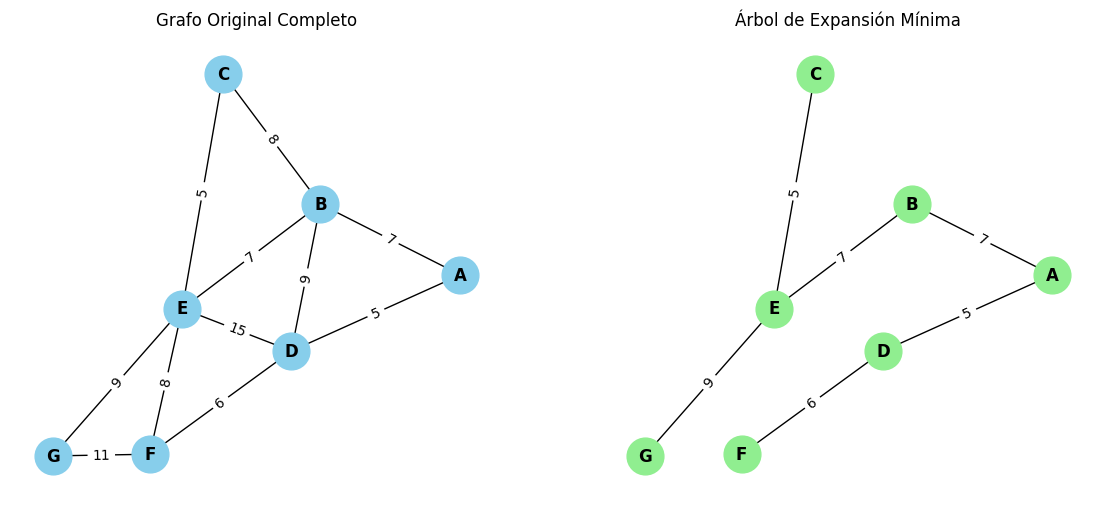

In [834]:
#Crear una figura con dos gráficas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Dibujar el Grafo Original
axes[0].set_title('Grafo Original Completo')
nx.draw(G, posicion1, ax=axes[0], with_labels=True, node_color='skyblue', node_size=700, font_weight='bold')
nx.draw_networkx_edge_labels(G, posicion1, ax=axes[0], edge_labels=edge_labels_g)

#Dibujar el Árbol de Expansión Mínima
axes[1].set_title('Árbol de Expansión Mínima')
nx.draw(arbol_expansion_min, posicion1, ax=axes[1], with_labels=True, node_color='lightgreen', node_size=700, font_weight='bold')
nx.draw_networkx_edge_labels(arbol_expansion_min, posicion1, ax=axes[1], edge_labels=edge_labels_arbol)
plt.show()

In [835]:
suma_pesos_original = 0

#G.edges(data=True) nos da cada arco con todos sus datos.
#Inicia el ciclo for
for origen, destino, datos_del_arco in G.edges(data=True):

    #De cada arco, se obtiene el valor del peso
    peso_del_arco = datos_del_arco['weight']

    #A la suma de pesos original, se le suma el peso del arco que es lo anterior
    suma_pesos_original = suma_pesos_original + peso_del_arco

In [836]:
#Inicializamos la suma de pesos del arbol
suma_pesos_arbol = 0

#Se recorre cada arco del grafo 'arbol_expansion_min'
#Inicia el ciclo for
for origen, destino, datos_del_arco in arbol_expansion_min.edges(data=True):

    #Se saca el valor de su peso
    peso_del_arco = datos_del_arco['weight']

    # 4. Lo sumamos al total del árbol.
    suma_pesos_arbol = suma_pesos_arbol + peso_del_arco

In [837]:
print(f"Peso total del grafo original: {suma_pesos_original}")
print(f"Peso total del Árbol de Expansión Mínima : {suma_pesos_arbol}")

Peso total del grafo original: 90
Peso total del Árbol de Expansión Mínima : 39


**Ruta más corta**

In [838]:
import networkx as nx
import matplotlib.pyplot as plt

In [839]:
G = nx.Graph()

In [840]:
G.add_edge('A', 'B', weight = 3)
G.add_edge('A', 'C', weight = 3)
G.add_edge('B', 'C', weight = 1)
G.add_edge('B', 'D', weight = 3)
G.add_edge('C', 'D', weight = 3)

In [841]:
#Para la ruta más corta
inicio = 'A'
final = 'D'

ruta_corta  = nx.shortest_path(G, source=inicio, target=final, weight='weight', method='dijkstra')
#print("La ruta más corta es: ", ruta_corta) #Para ver cuál es la ruta más corta

#Para la distancia de la ruta más corta
distancia = nx.shortest_path_length(G, source=inicio, target=final, weight='weight', method='dijkstra')
#print("La distancia de la ruta más corta es: ", distancia)

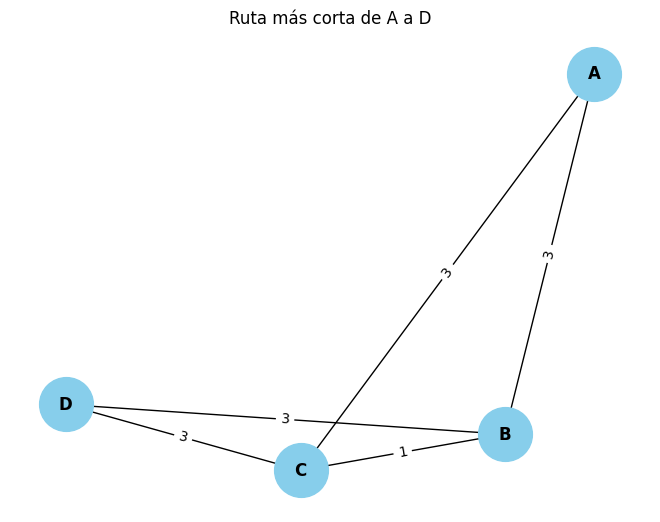

La ruta más corta es:  ['A', 'B', 'D']
La distancia de la ruta más corta es:  6


In [842]:
#Esto es para fijar los nodos y no cambien cada vez que se compila
posicion2 = nx.spring_layout(G, seed=42)

#Dibujar el grafo
nx.draw(G, posicion2, with_labels=True, node_color='skyblue', node_size=1500, font_weight='bold')

#Esto es para incluir las etiquetas de los'weight'
edge_labels = nx.get_edge_attributes(G, 'weight')

#Esto dibuja las eyiquetas de los arcos
nx.draw_networkx_edge_labels(G, posicion2, edge_labels=edge_labels)

#Para mostrar el titulo del grafo
plt.title("Ruta más corta de A a D")
plt.show() #Mostrar el grafo

print("La ruta más corta es: ", ruta_corta) #Para ver cuál es la ruta más corta
print("La distancia de la ruta más corta es: ", distancia)#Para ver la distancia de la ruta más corta

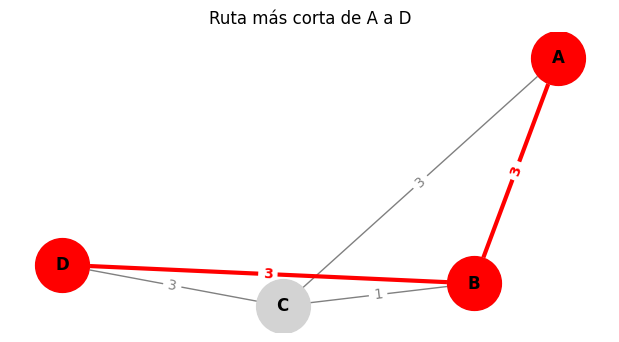

In [843]:
#Para hacer el grafo más detallado

#Esto es para tener la lista de los arcos, de donde a donde va
lista_arcos = list(zip(ruta_corta, ruta_corta[1:]))

#Esto es para el tamaño de la grafica
plt.figure(figsize=(6, 3))

#Se tiene que hacer por capas
#Primera capa
nx.draw(G, posicion2,
        with_labels=True,
        node_color='lightgray',
        node_size=1500,
        font_weight='bold',
        edge_color='gray',
        width=1)
#Tanto los nodos como los arcos son grises, se puede ver que tan tuenes están en el grafo

nx.draw_networkx_edge_labels(G, posicion2, edge_labels=edge_labels, font_color='gray')

#Segunda capa
#Se dibujan los nodos de rojos pero los de la ruta más corta
nx.draw_networkx_nodes(G, posicion2,
                        nodelist=ruta_corta,
                        node_color='red',
                        node_size=1500)

#Se dibujan los arcos de rojo, igual que los nodos los de la ruta más corta
nx.draw_networkx_edges(G, posicion2,
                        edgelist= lista_arcos,
                        edge_color='red',
                        width=3)
#Los arcos más grandes que los arcos de la primera capa

#Se dibujan las etiquetas, para que no queden encima de las grises
#Crea un diccionario de etiquetas solo para los arcos de la ruta
edge_labels_ruta = {edge: edge_labels[edge] for edge in lista_arcos}
nx.draw_networkx_edge_labels(G, posicion2,
                             edge_labels=edge_labels_ruta,
                             font_color='red',
                             font_weight='bold')


#Para mostrar el grafo
plt.title(f"Ruta más corta de {inicio} a {final}")
plt.show()